# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.784703e+01     1.308395e+01
 * time: 0.0016019344329833984
     1     3.584738e+01     8.237054e+00
 * time: 0.00603795051574707
     2     3.388460e+01     1.517501e+01
 * time: 0.01137995719909668
     3     2.388224e+01     4.575069e+00
 * time: 0.017431020736694336
     4     2.054442e+01     1.868524e+00
 * time: 0.02272200584411621
     5     2.012580e+01     3.212745e+00
 * time: 0.0272369384765625
     6     1.938548e+01     2.002655e+00
 * time: 0.03261899948120117
     7     1.871978e+01     2.241666e+00
 * time: 0.06852507591247559
     8     1.818622e+01     1.552640e+00
 * time: 0.07242989540100098
     9     1.778198e+01     1.220072e+00
 * time: 0.07624602317810059
    10     1.742063e+01     1.270627e+00
 * time: 0.07999205589294434
    11     1.724008e+01     7.561351e-01
 * time: 0.08378291130065918
    12     1.715150e+01     9.308652e-01
 * time: 0.0867469310760498
    13     1.710241e+01     5.043880e-01
 * time

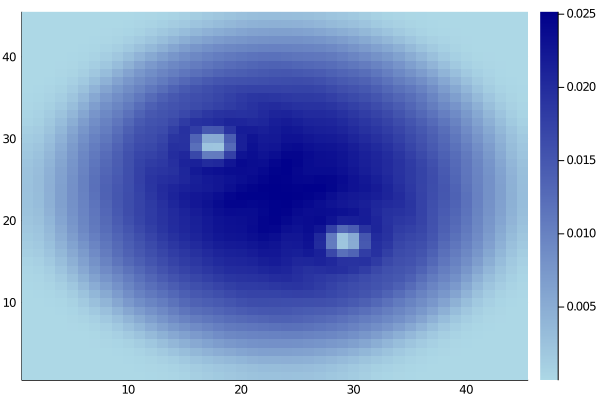

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)